In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image, view_image_rgb

import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import make_lupton_rgb
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import configparser
import psycopg2
import re
from datetime import datetime
import scipy
import random

In [10]:
config_file = 'configs/pax_source.yaml'

In [11]:
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

Entering main organization loop
Organizing CONFIGURATION_1
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 2 M 45 S         


In [89]:
10 ** (-0.4 * 23.5)

3.9810717055349694e-10

In [4]:
def vis_random_dist(data):
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))

    # Set the random seed for reproducibility
    np.random.seed(0)

    # Generate random i values between 1 and 100
    i_values = np.random.randint(1, 101, size=(4, 4))

    for i in range(2):
        for j in range(4):
            title = axs[i, j].set_title("i = " + str(i_values[i, j]))
            im = axs[i, j].imshow(data[i_values[i, j]][0])
            axoff = axs[i, j].axis('off')

    plt.tight_layout()
    plt.colorbar(im, ax=axs.ravel().tolist())
    return fig, axs

In [5]:
source_des = np.load('pax_source_des/CONFIGURATION_1_images.npy')

Text(0.4, 1, 'Sky Brightness = 10,000')

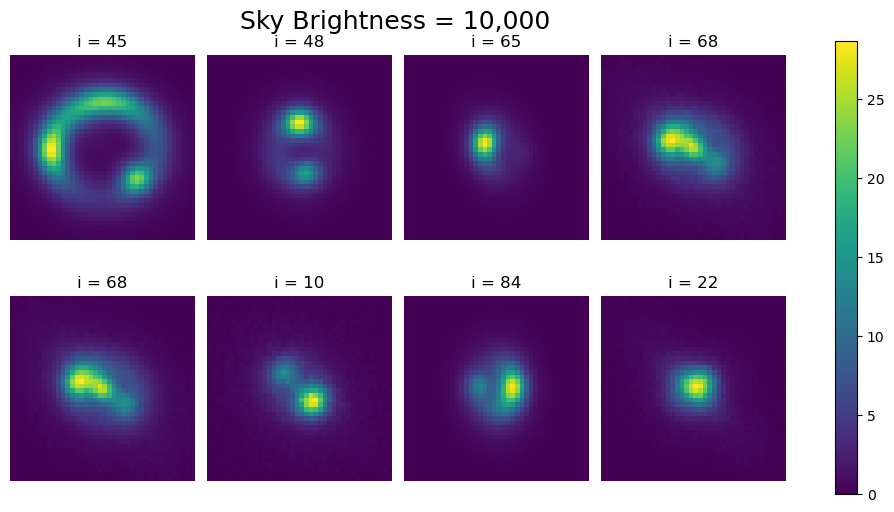

In [6]:
fig, _ = vis_random_dist(source_des)
fig.suptitle("Sky Brightness = 10,000", x = 0.4, fontsize = 18, y = 1)

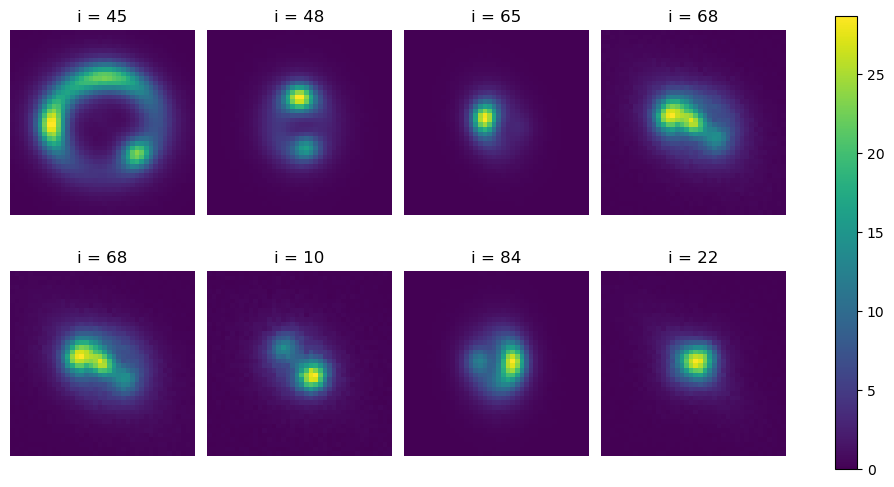

In [69]:
_, _ = vis_random_dist(source_des)

In [4]:
target_file = 'configs/pax_target.yaml'    

In [5]:
dataset = dl.make_dataset(target_file, verbose=True, save_to_disk=True)

Entering main organization loop
Organizing CONFIGURATION_1
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 2 M 56 S         


In [8]:
source = np.load('pax_source/CONFIGURATION_1_images.npy')
target = np.load('pax_target/CONFIGURATION_1_images.npy')

In [16]:
images1.shape

(99, 1, 40, 40)

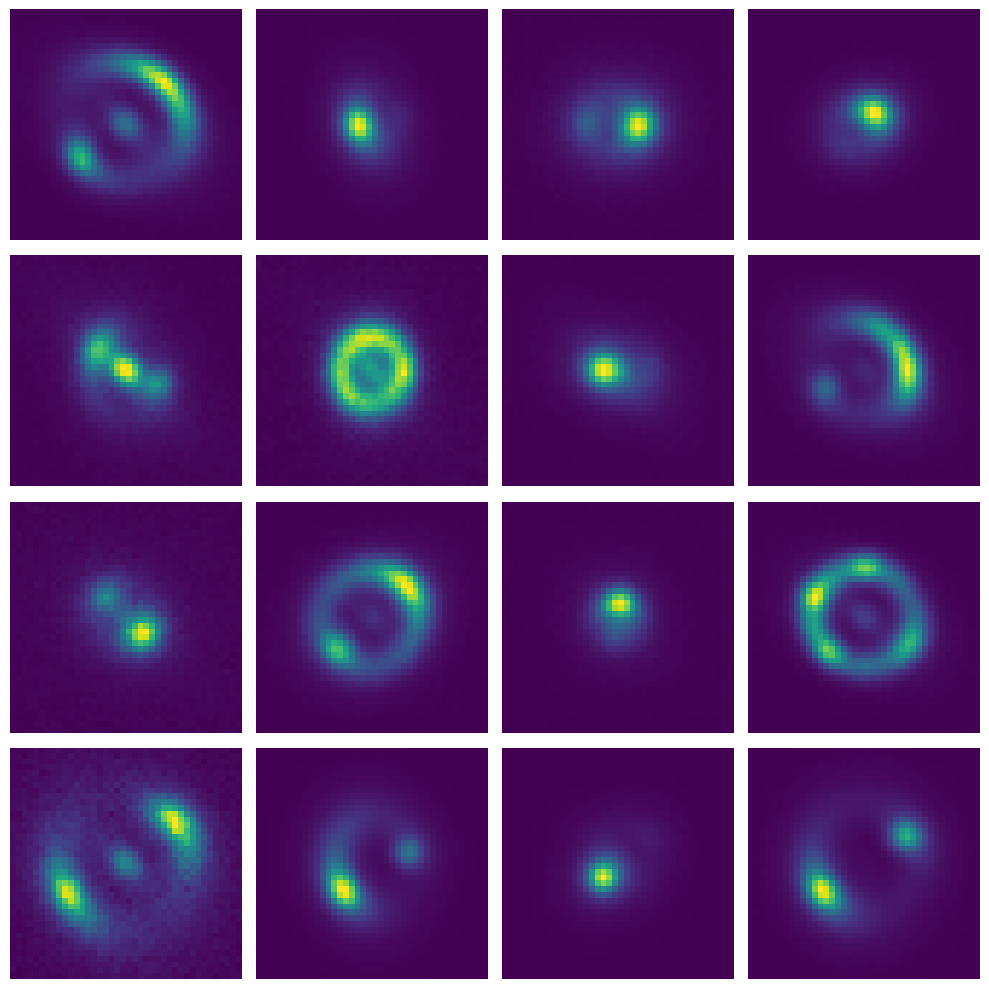

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        im = axs[i, j].imshow(source[i * 5 + j][0])
        axoff = axs[i, j].axis('off')

plt.tight_layout()

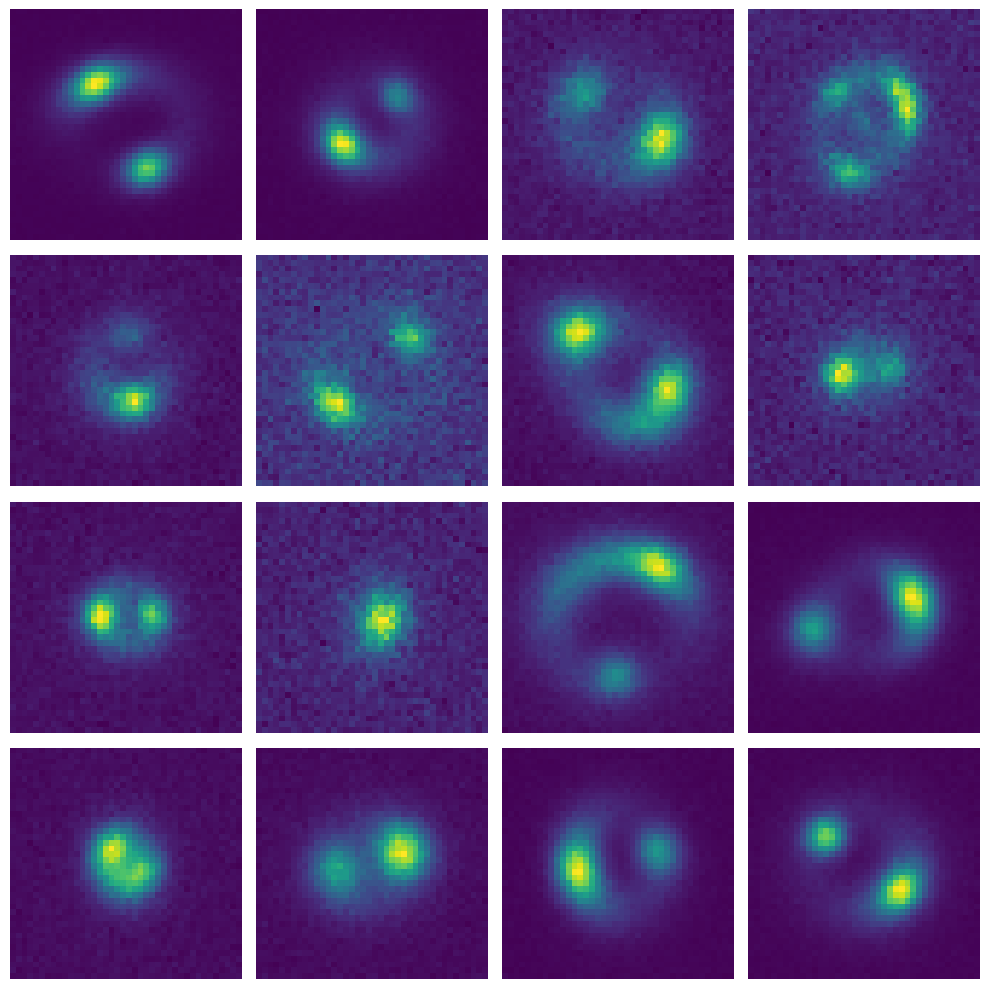

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        im = axs[i, j].imshow(target[i * 5 + j][0])
        axoff = axs[i, j].axis('off')

plt.tight_layout()

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer

In [23]:
# Normalize the source dataset
sc = np.log1p(source)
source_scaler = RobustScaler()
normalized_source = source_scaler.fit_transform(sc.reshape(sc.shape[0], -1)).reshape(sc.shape)

tg = np.log1p(target)
# Normalize the target dataset
target_scaler = RobustScaler()
normalized_target = target_scaler.fit_transform(tg.reshape(tg.shape[0], -1)).reshape(tg.shape)

In [24]:
normalized_source.shape

(49999, 1, 40, 40)

In [27]:
np.save('pax_source/paxnorm_source.npy', normalized_source)
np.save('pax_target/paxnorm_target.npy', normalized_target)

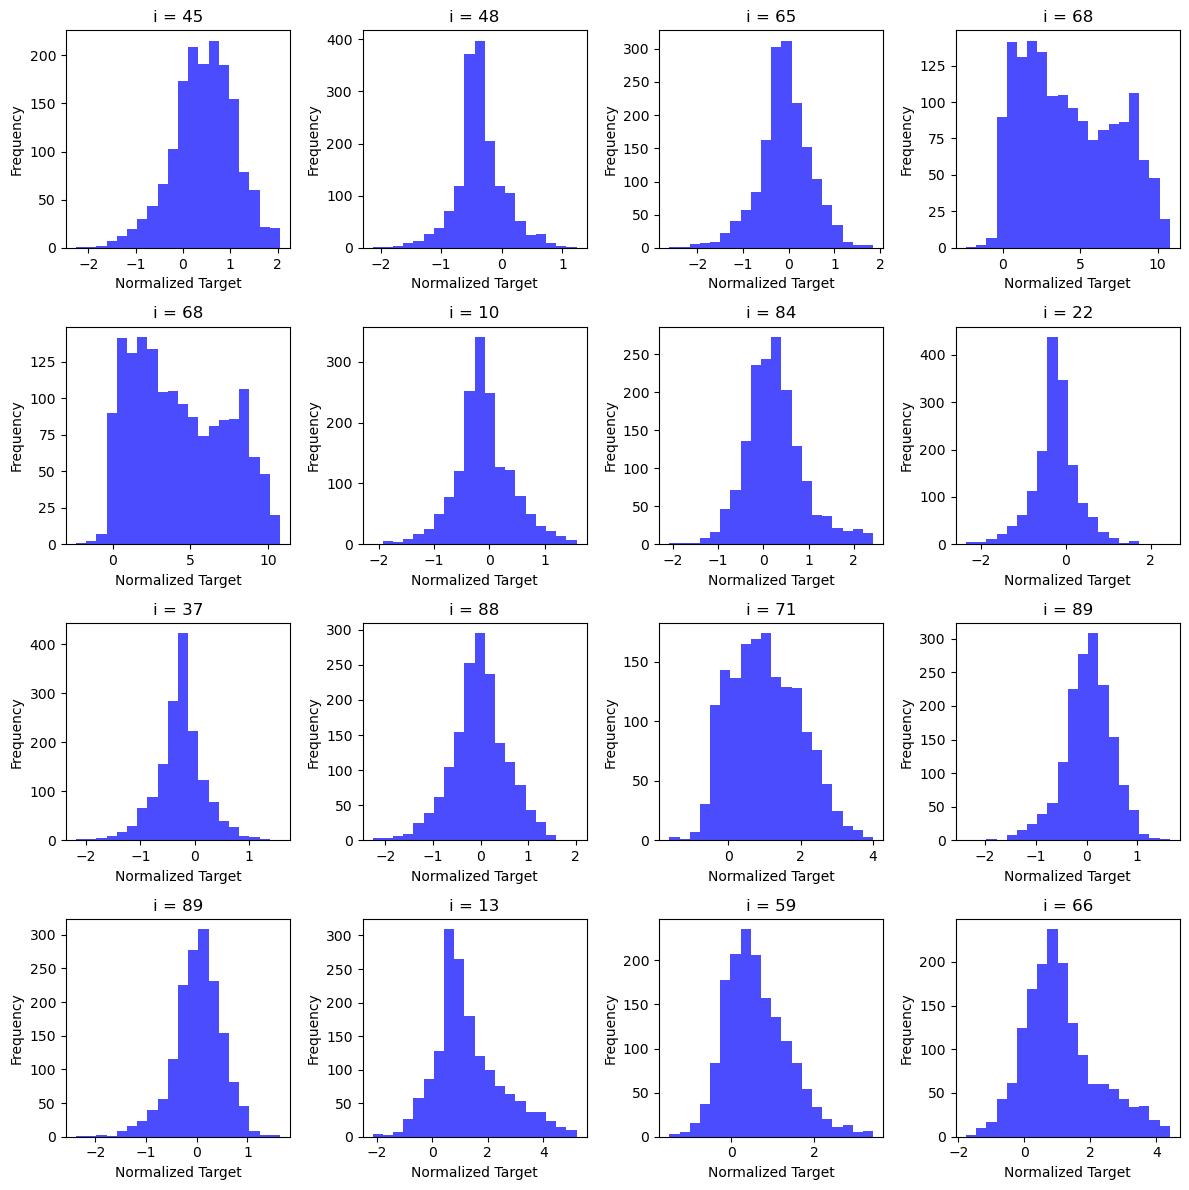

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        # Get the normalized_source for the current i value
        normalized_source_i = normalized_target[i_values[i, j]]
        
        # Plot the histogram
        a = axs[i, j].hist(normalized_source_i.flatten(), bins=20, color='blue', alpha=0.7)
        b = axs[i, j].set_title(f'i = {i_values[i, j]}')
        c = axs[i, j].set_xlabel('Normalized Target')
        d = axs[i, j].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

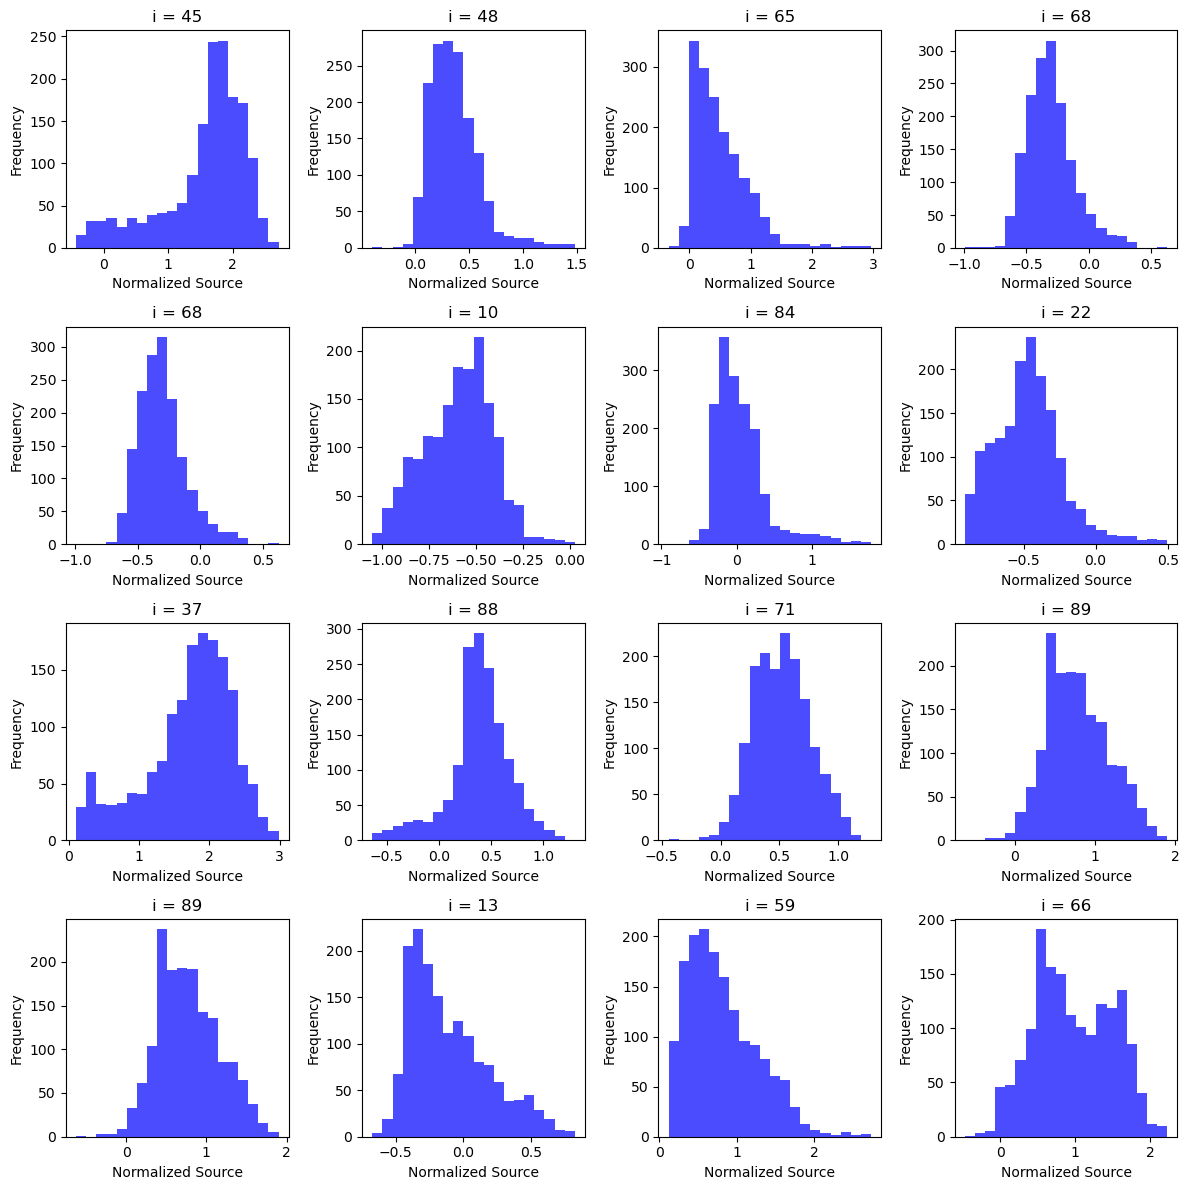

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        # Get the normalized_source for the current i value
        normalized_source_i = normalized_source[i_values[i, j]]
        
        # Plot the histogram
        a = axs[i, j].hist(normalized_source_i.flatten(), bins=20, color='blue', alpha=0.7)
        b = axs[i, j].set_title(f'i = {i_values[i, j]}')
        c = axs[i, j].set_xlabel('Normalized Source')
        d = axs[i, j].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

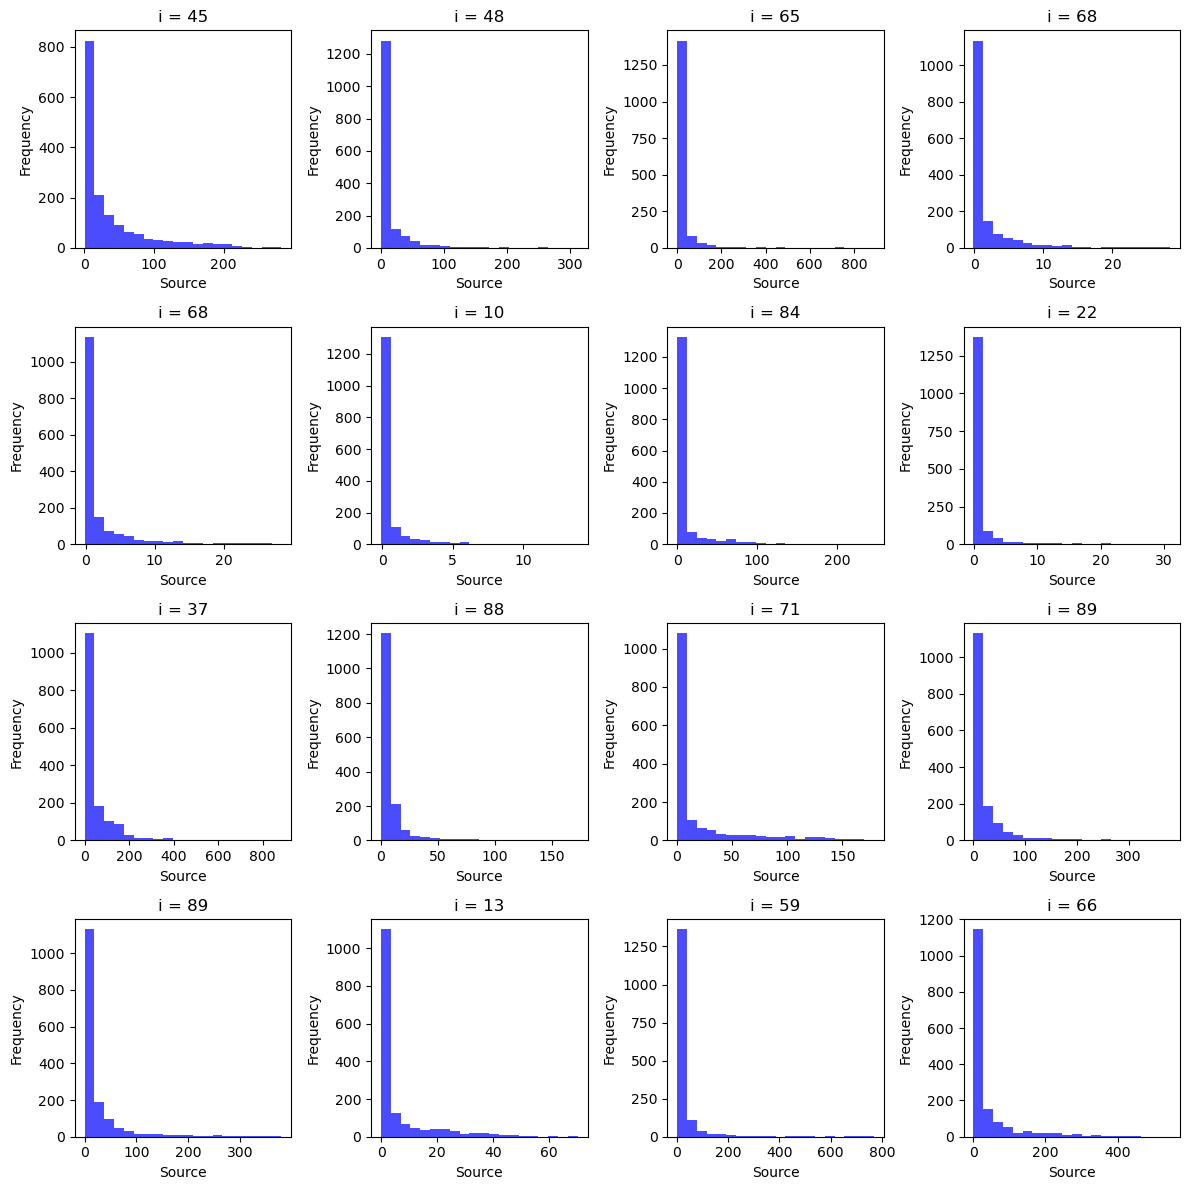

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        # Get the normalized_source for the current i value
        normalized_source_i = source[i_values[i, j]]
        
        # Plot the histogram
        a = axs[i, j].hist(normalized_source_i.flatten(), bins=20, color='blue', alpha=0.7)
        b = axs[i, j].set_title(f'i = {i_values[i, j]}')
        c = axs[i, j].set_xlabel('Source')
        d = axs[i, j].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

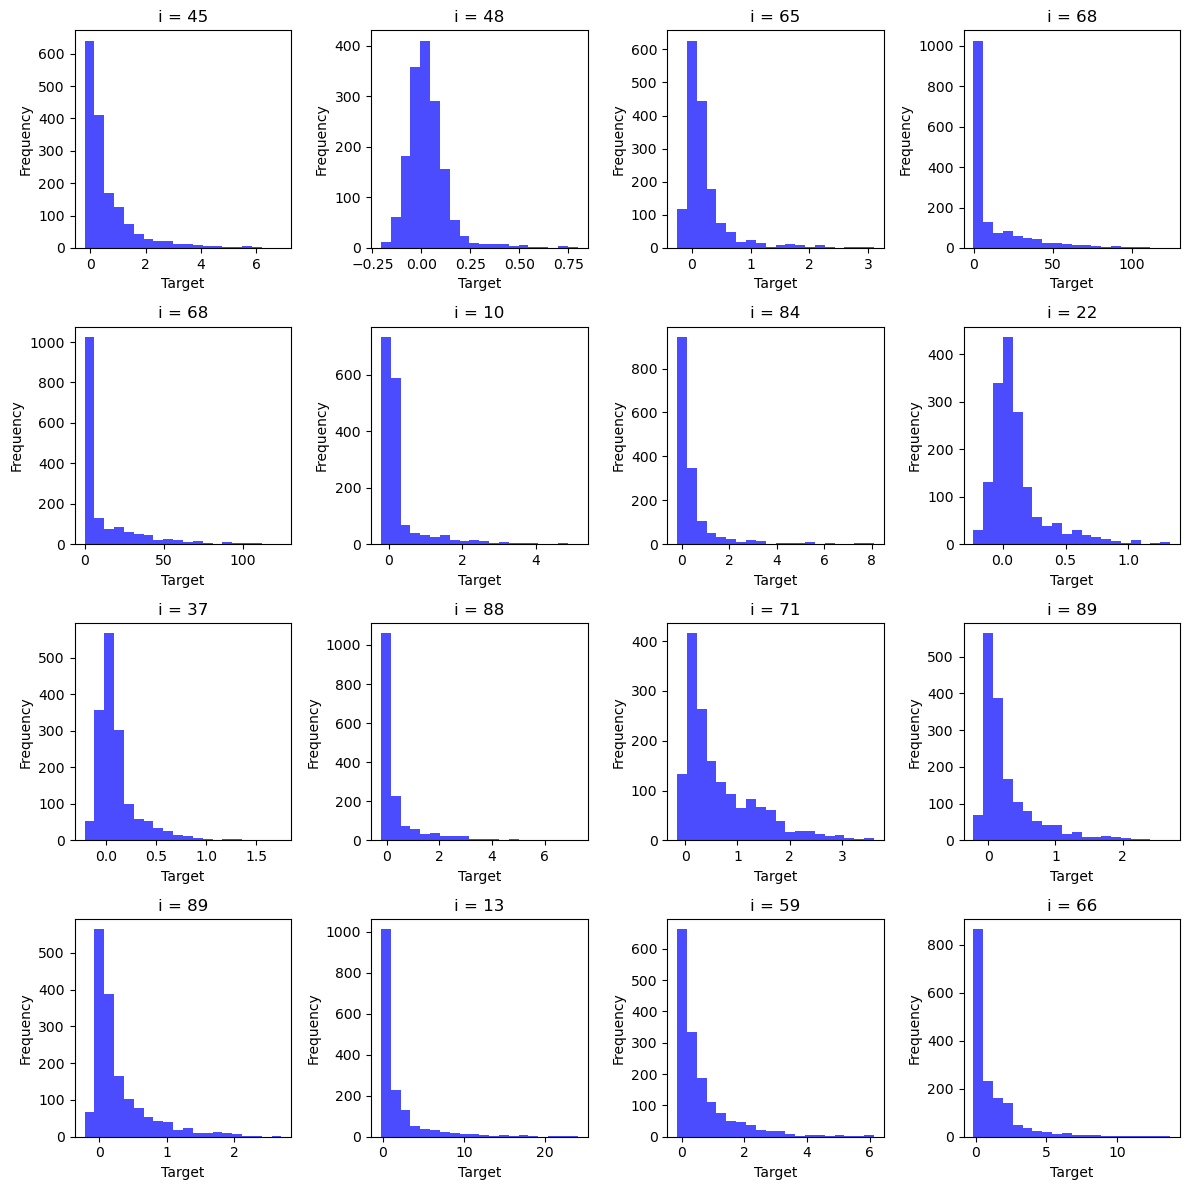

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        # Get the normalized_source for the current i value
        normalized_source_i = target[i_values[i, j]]
        
        # Plot the histogram
        a = axs[i, j].hist(normalized_source_i.flatten(), bins=20, color='blue', alpha=0.7)
        b = axs[i, j].set_title(f'i = {i_values[i, j]}')
        c = axs[i, j].set_xlabel('Target')
        d = axs[i, j].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

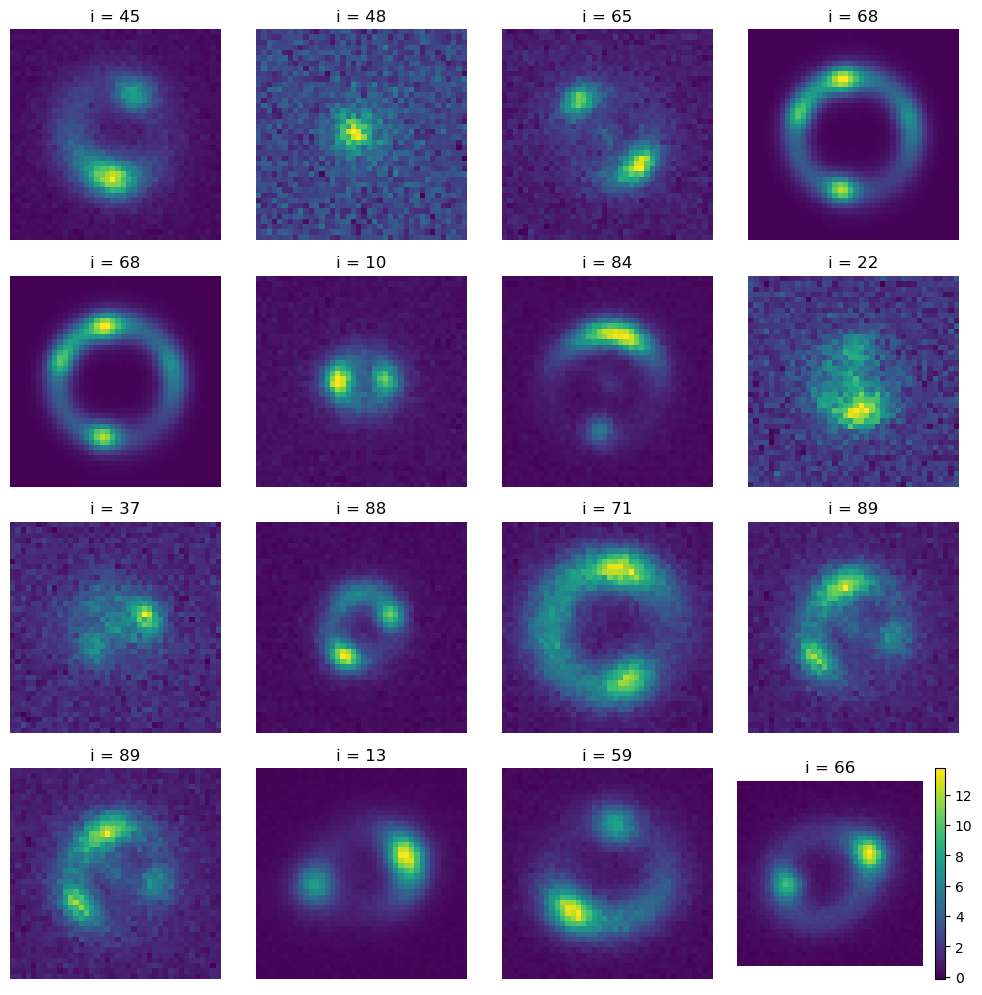

In [29]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

for i in range(4):
    for j in range(4):
        title = axs[i, j].set_title("i = " + str(i_values[i, j]))
        im = axs[i, j].imshow(target[i_values[i, j]][0])
        axoff = axs[i, j].axis('off')

plt.tight_layout()
plt.colorbar(im)

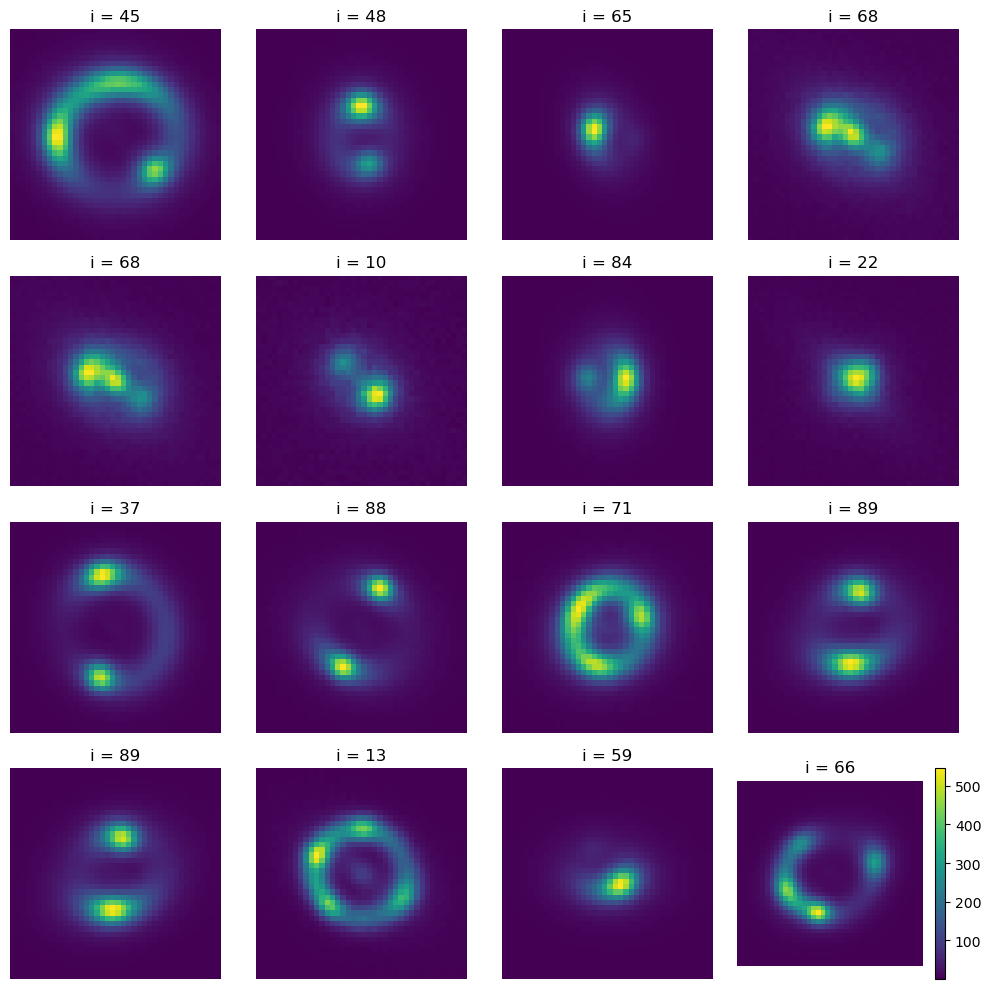

In [39]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

for i in range(4):
    for j in range(4):
        title = axs[i, j].set_title("i = " + str(i_values[i, j]))
        im = axs[i, j].imshow(source[i_values[i, j]][0])
        axoff = axs[i, j].axis('off')

plt.tight_layout()
plt.colorbar(im)

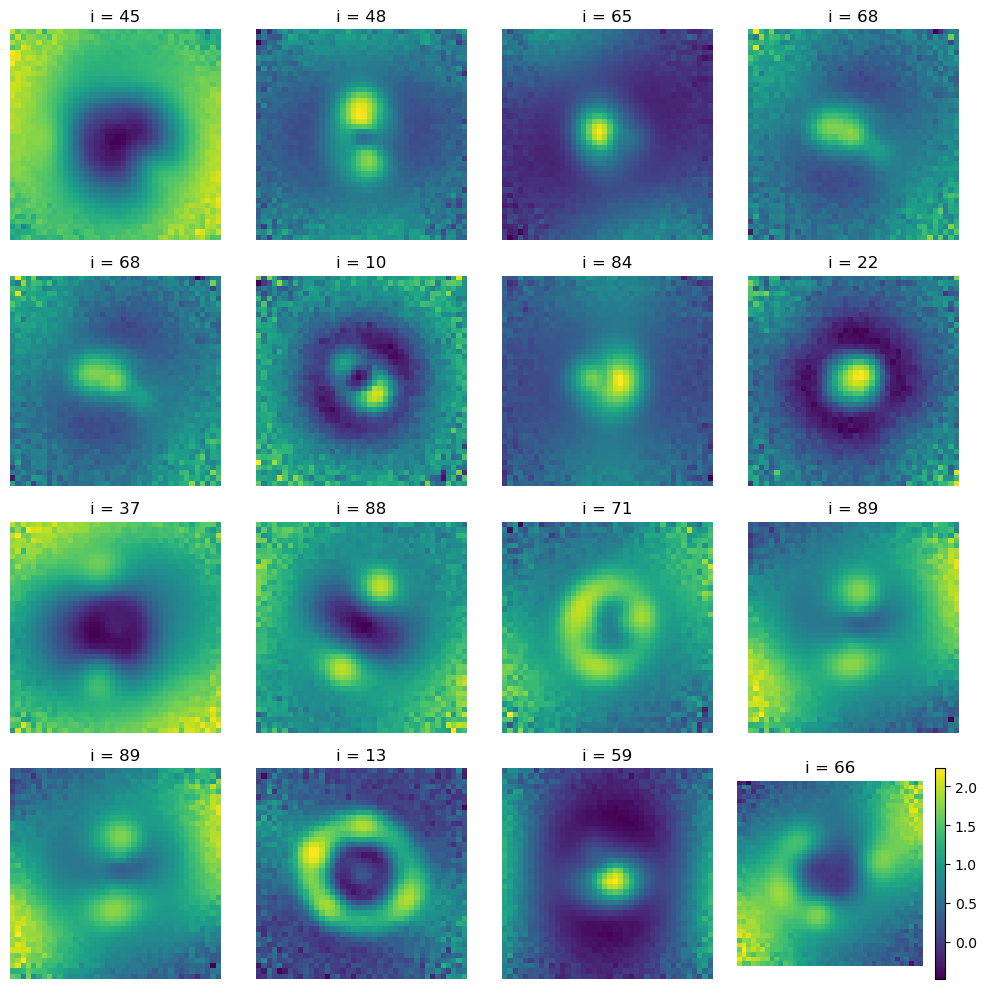

In [40]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

for i in range(4):
    for j in range(4):
        title = axs[i, j].set_title("i = " + str(i_values[i, j]))
        im = axs[i, j].imshow(normalized_source[i_values[i, j]][0])
        axoff = axs[i, j].axis('off')

plt.tight_layout()
plt.colorbar(im)

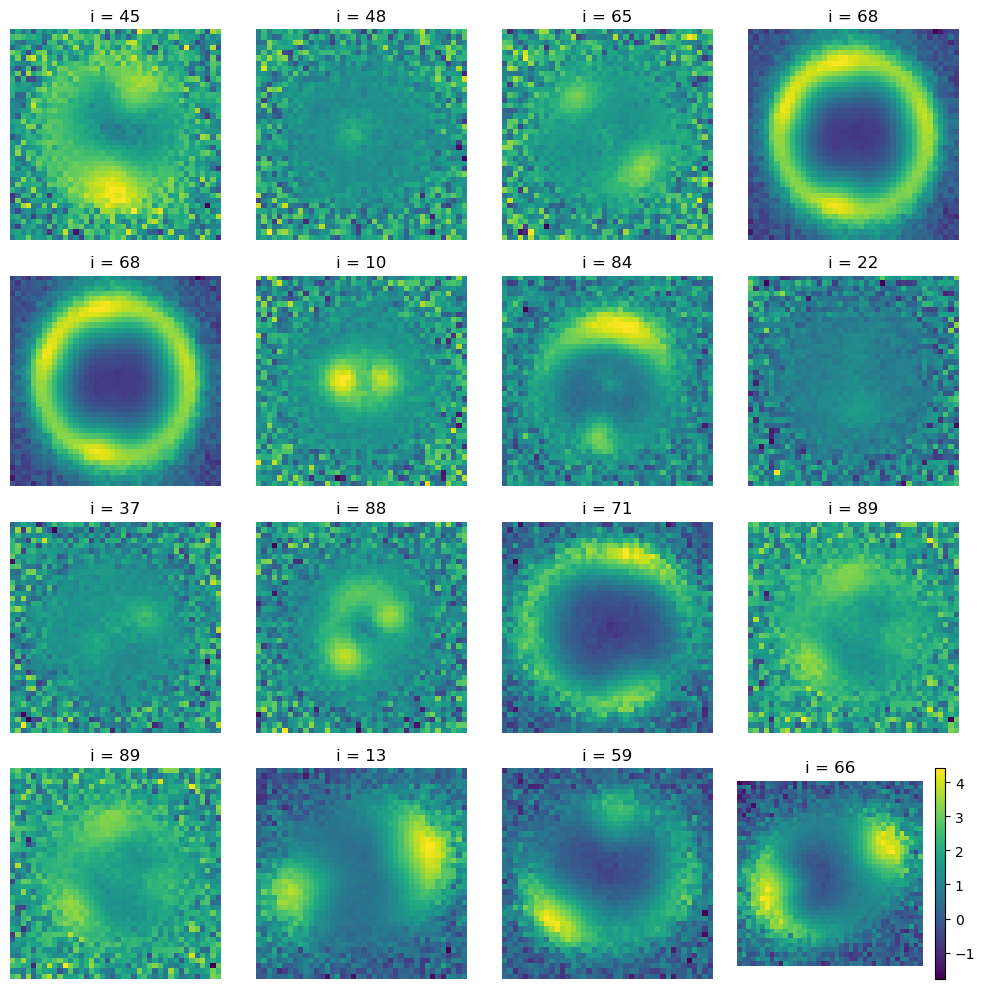

In [41]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

for i in range(4):
    for j in range(4):
        title = axs[i, j].set_title("i = " + str(i_values[i, j]))
        im = axs[i, j].imshow(normalized_target[i_values[i, j]][0])
        axoff = axs[i, j].axis('off')

plt.tight_layout()
plt.colorbar(im)

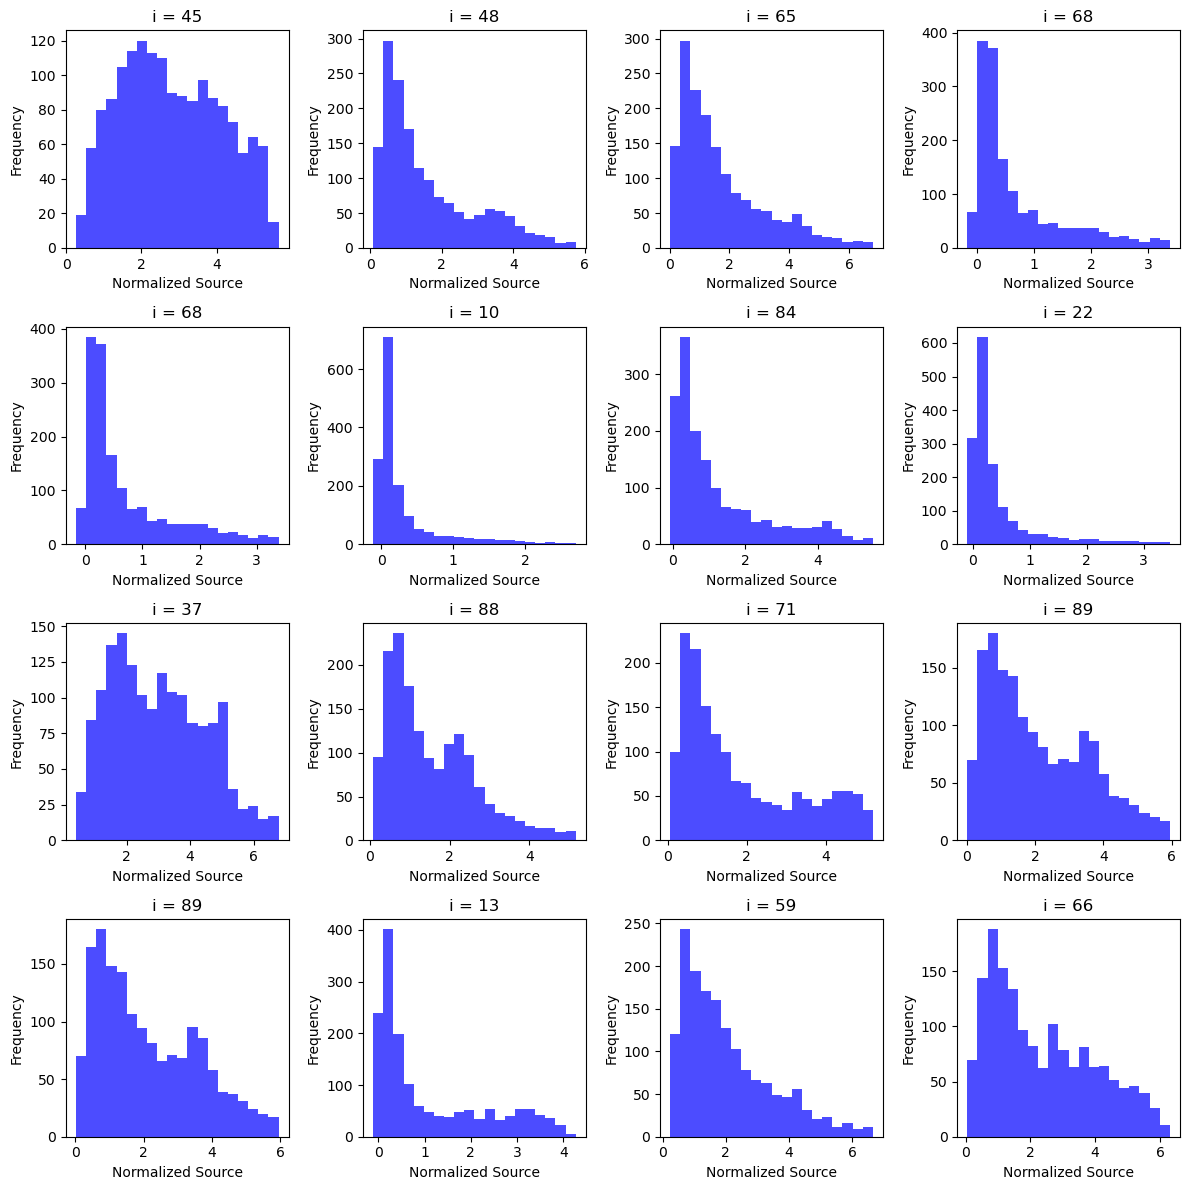

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random i values between 1 and 100
i_values = np.random.randint(1, 101, size=(4, 4))

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        # Get the normalized_source for the current i value
        normalized_source_i = sc[i_values[i, j]]
        
        # Plot the histogram
        a = axs[i, j].hist(normalized_source_i.flatten(), bins=20, color='blue', alpha=0.7)
        b = axs[i, j].set_title(f'i = {i_values[i, j]}')
        c = axs[i, j].set_xlabel('Normalized Source')
        d = axs[i, j].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()